In [3]:
import matplotlib.pyplot as plt  
from mpl_toolkits import mplot3d
import numpy as np     
import cv2 as cv
import time
import random
from IPython.display import clear_output
from matplotlib.colors import ListedColormap
from matplotlib import cm

Distances to centroids 

In [4]:
def dist2c(data, centroids):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data      : numpy array of size N x d
    #          centroids : numpy array of size c x d
    # Output - dist      : numpy array of size c x N
    # N = the number of data points, c = the number of centroids, d = dimension of data

    ### Insert your solution here ###
    data_h, data_w = data.shape
    cent_h, cent_w = centroids.shape
    dist = np.zeros((cent_h,data_h))
    
    for i in range(cent_h):
        for j in range(data_h):
            dist[i,j] = (centroids[i,0]-data[j,0])**2 + (centroids[i,1]-data[j,1])**2 + (centroids[i,2]-data[j,2])**2

    return dist

Random Initialisation of centroids 

In [5]:
def random_centroids(data, k):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data     : numpy array (N x d)
    #        - k        : an integer value
    # Output - centroids: numpy array (k x d)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###
    h_data, w_data = data.shape
    centroids = np.empty((k,3))
    
    
    for i in range(k):
        x = random.randint(0,h_data)
        
        centroids[i,:] = data[x,:]    
    return centroids

Performing K-Means 

In [6]:
def mykMeans(data, centroids, T):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - centroids   : numpy array (k x d)
    #         - T           : integer
    # Outputs - cluster_idx : numpy array (N,)
    #         - centroids   : numpy array (k x d)
    #         - losses      : list (T)
    # N = number of data points, d = dimension of data, k = number of centroids, T = number of iterations
    
    
    ### Insert your solution here ###
    h_data, w_data = data.shape
    h_cent, w_cent = centroids.shape
    
    kMeans_loss = []
    cluster_idx = np.empty((h_data))
    
    #Assigning the data points an index of the closest centroid 
        
    #Finding distances for the initial part
    dists = dist2c(data,centroids)
    h_dists, w_dists = dists.shape
    #looping through the distance array to find the smallest for each point 
    for k in range(w_dists):
        min_in = 0
        for j in range(1,h_dists):
            if dists[j,k] < dists[min_in,k]:
                min_in = j
            
        #assign to cluster_idx
        cluster_idx[k] = min_in
    
    print('Performing k-means')
    
    for i in range(T):
                
        sums = np.zeros((h_cent,3))
        nOd = np.zeros((h_cent))
        
        #finding the mean value 
        
        #summing together the points
        for n in range(h_data):
            sums[int(cluster_idx[n]),:] += data[n,:]
            nOd[int(cluster_idx[n])] += 1
            
        #finding the mean
        for n in range(h_cent):
            if nOd[n] != 0:
                centroids[n,:] = sums[n,:]/nOd[n]
        
        #Assigning the data points an index of the closest centroid 
        
        #Finding distances
        dists = dist2c(data,centroids)
        h_dists, w_dists = dists.shape
        
        #looping through the distance array to find the smallest for each point 
        loss = 0
        for k in range(w_dists):
            min_in = 0
            for j in range(1,h_dists):
                if dists[j,k] < dists[min_in,k]:
                    min_in = j
            #detemining loss
            loss += dists[min_in,k]
            
            #assign to cluster_idx
            cluster_idx[k] = min_in

        
        #updating k_means loss
        kMeans_loss.append(loss)
     
        
    return cluster_idx, centroids, kMeans_loss

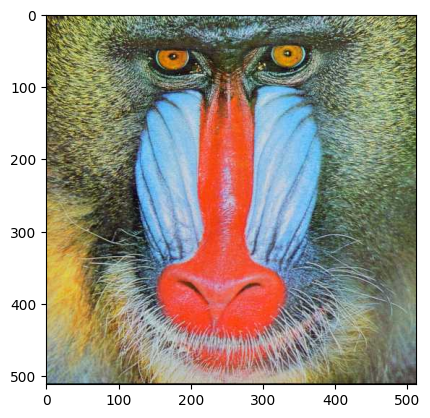

In [7]:
mandrill = cv.imread('mandrill.jpg',cv.IMREAD_COLOR)
mandrill = cv.cvtColor(mandrill, cv.COLOR_BGR2RGB)
plt.imshow(mandrill)
plt.show()

Performing k-means
Updating new image values 


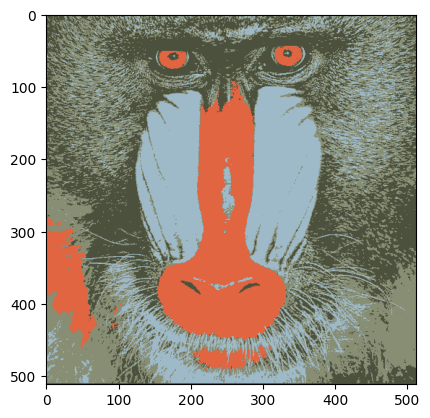

In [8]:
np.random.seed(12)

#new image 

new_man = np.copy(mandrill)
### Insert your solution here ###
# Initialize centroids, perform k-means and visualise the clustered colour image
h_mandrill, w_mandrill, d_mandrill = mandrill.shape
N = h_mandrill*w_mandrill

data = new_man.reshape(N,3)

k = 4 # Number of centroids
T = 4 # Iterations for k-means 

#initialising centorids and running k-means
centroids = random_centroids(data,k)

cluster_idx, centroids, kMeans_loss = mykMeans(data, centroids, T)

#reshape cluster_idx to loop through later 
clust_id_re = cluster_idx.reshape(h_mandrill, w_mandrill)

#print confirmation
print('Updating new image values ')

#changing the pixel colours 
for i in range(h_mandrill):
    for j in range(w_mandrill):
        new_man[i,j,:] = centroids[int(clust_id_re[i,j])]


plt.imshow(new_man)
plt.show()

Visualise the Centroids 

In [9]:
def visualize(data, cluster_idx, centroids, sample_idx):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - cluster_idx : numpy array (N,)
    #         - centroids   : numpy array (k x d)
    #         - sample_idx  : numpy array (250,)
    # Outputs - figure      : subplot (1, 2)
    # N = number of data points, d = dimension of data, k = number of centroids
    c_list = ['red','blue','green','yellow','purple','black','orange','brown']
    fig = plt.figure(figsize=plt.figaspect(2.))
    fig.set_figwidth(40)
    fig.set_figheight(25)

    
    h_cent, w_cent = centroids.shape
    # Create 3D scatter plot with corresponding colours as first sub-plot
    
    ax = fig.add_subplot(1,2,1, projection='3d')
    
    #plotting the 250 random sample points 
    for i in range(250):
        x = int(sample_idx[i])
        ax.scatter(data[x,0],data[x,1],data[x,2],s =201,c= c_list[int(cluster_idx[x])],marker='o')
    
    #plotting the centroids
    for i in range(h_cent):
        ax.scatter(centroids[i,0],centroids[i,1],centroids[i,2],s=1501,color = c_list[i],marker = '^',edgecolors= "black", linewidth = 4)

    ax.set_title('Scatter plot of data points', fontsize = 30)
    ax.set_xlabel('R',fontsize = 30)
    ax.set_ylabel('G', fontsize = 30)
    ax.set_zlabel('B', fontsize = 30)

    # Create visualization of the clustered image as second sub-plot
    
    #reshape cluster_idx to loop through later
    clust_id_re = cluster_idx.reshape(h_mandrill, w_mandrill)
    
    #copying the data as to not destroy it for later iterations 
    data2 = np.copy(data)
    new_im = data2.reshape(h_mandrill,w_mandrill, 3)
    
    #changing the pixel colours 
    for i in range(h_mandrill):
        for j in range(w_mandrill):
            new_im[i,j,:] = centroids[int(clust_id_re[i,j])]
            
    ax = fig.add_subplot(1, 2, 2)
    
    ax.imshow(new_im)
    
    ax.set_title('Outputted image', fontsize = 30)
    
    # Show both visiualizations
    plt.show()

In [10]:
def mykMeans_visualize(data, centroids, T):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - centroids   : numpy array (k x d)
    #         - T           : integer
    # N = number of data points, d = dimension of data, k = number of centroids, T = number of iterations
    
    ### Insert your solution here ###
        
    h_data, w_data = data.shape
    h_cent, w_cent = centroids.shape
    
    #Initialising arrays
    kMeans_loss = []
    cluster_idx = np.empty((h_data))
    
    #Creating the sample indexes
    sample_idx = np.empty((250))
    
    for i in range(250):
        x = random.randint(0,h_data)
        sample_idx[i] = x
    
    
    
    #Assigning the data points an index of the closest centroid 
        
    #Finding distances for the initial part
    dists = dist2c(data,centroids)
    h_dists, w_dists = dists.shape
    #looping through the distance array to find the smallest for each point 
    for k in range(w_dists):
        min_in = 0
        for j in range(1,h_dists):
            if dists[j,k] < dists[min_in,k]:
                min_in = j
            
        #assign to cluster_idx
        cluster_idx[k] = min_in
    
        
    print('****Initial Clustering before K-means*********')
        
    visualize(data, cluster_idx, centroids, sample_idx)
    
    print('Performing k-means')
    
    #for loop through T
    for i in range(T):
        
        
        sums = np.zeros((h_cent,3))
        nOd = np.zeros((h_cent))
        
        #finding the mean value 
        
        #summing together the points
        for n in range(h_data):
            sums[int(cluster_idx[n]),:] += data[n,:]
            nOd[int(cluster_idx[n])] += 1
            
        #finding the mean
        for n in range(h_cent):
            if nOd[n] != 0:
                centroids[n,:] = sums[n,:]/nOd[n]
    
        #Assigning the data points an index of the closest centroid 
        
        #Finding distances
        dists = dist2c(data,centroids)
        
        h_dists, w_dists = dists.shape
        
        #looping through the distance array to find the smallest for each point 
        loss = 0
        for k in range(w_dists):
            min_in = 0
            for j in range(1,h_dists):
                if dists[j,k] < dists[min_in,k]:
                    min_in = j
            
            #detemining loss
            loss += dists[min_in,k]
            
            #assign to cluster_idx
            cluster_idx[k] = min_in

        
        #updating k_means loss
        kMeans_loss.append(loss)
        
        
        #Visualise 
        clear_output()
        time.sleep(2)
        print("Clustering after iteration number {}".format(i+1))
        visualize(data, cluster_idx, centroids, sample_idx)
        
    return

Clustering after iteration number 8


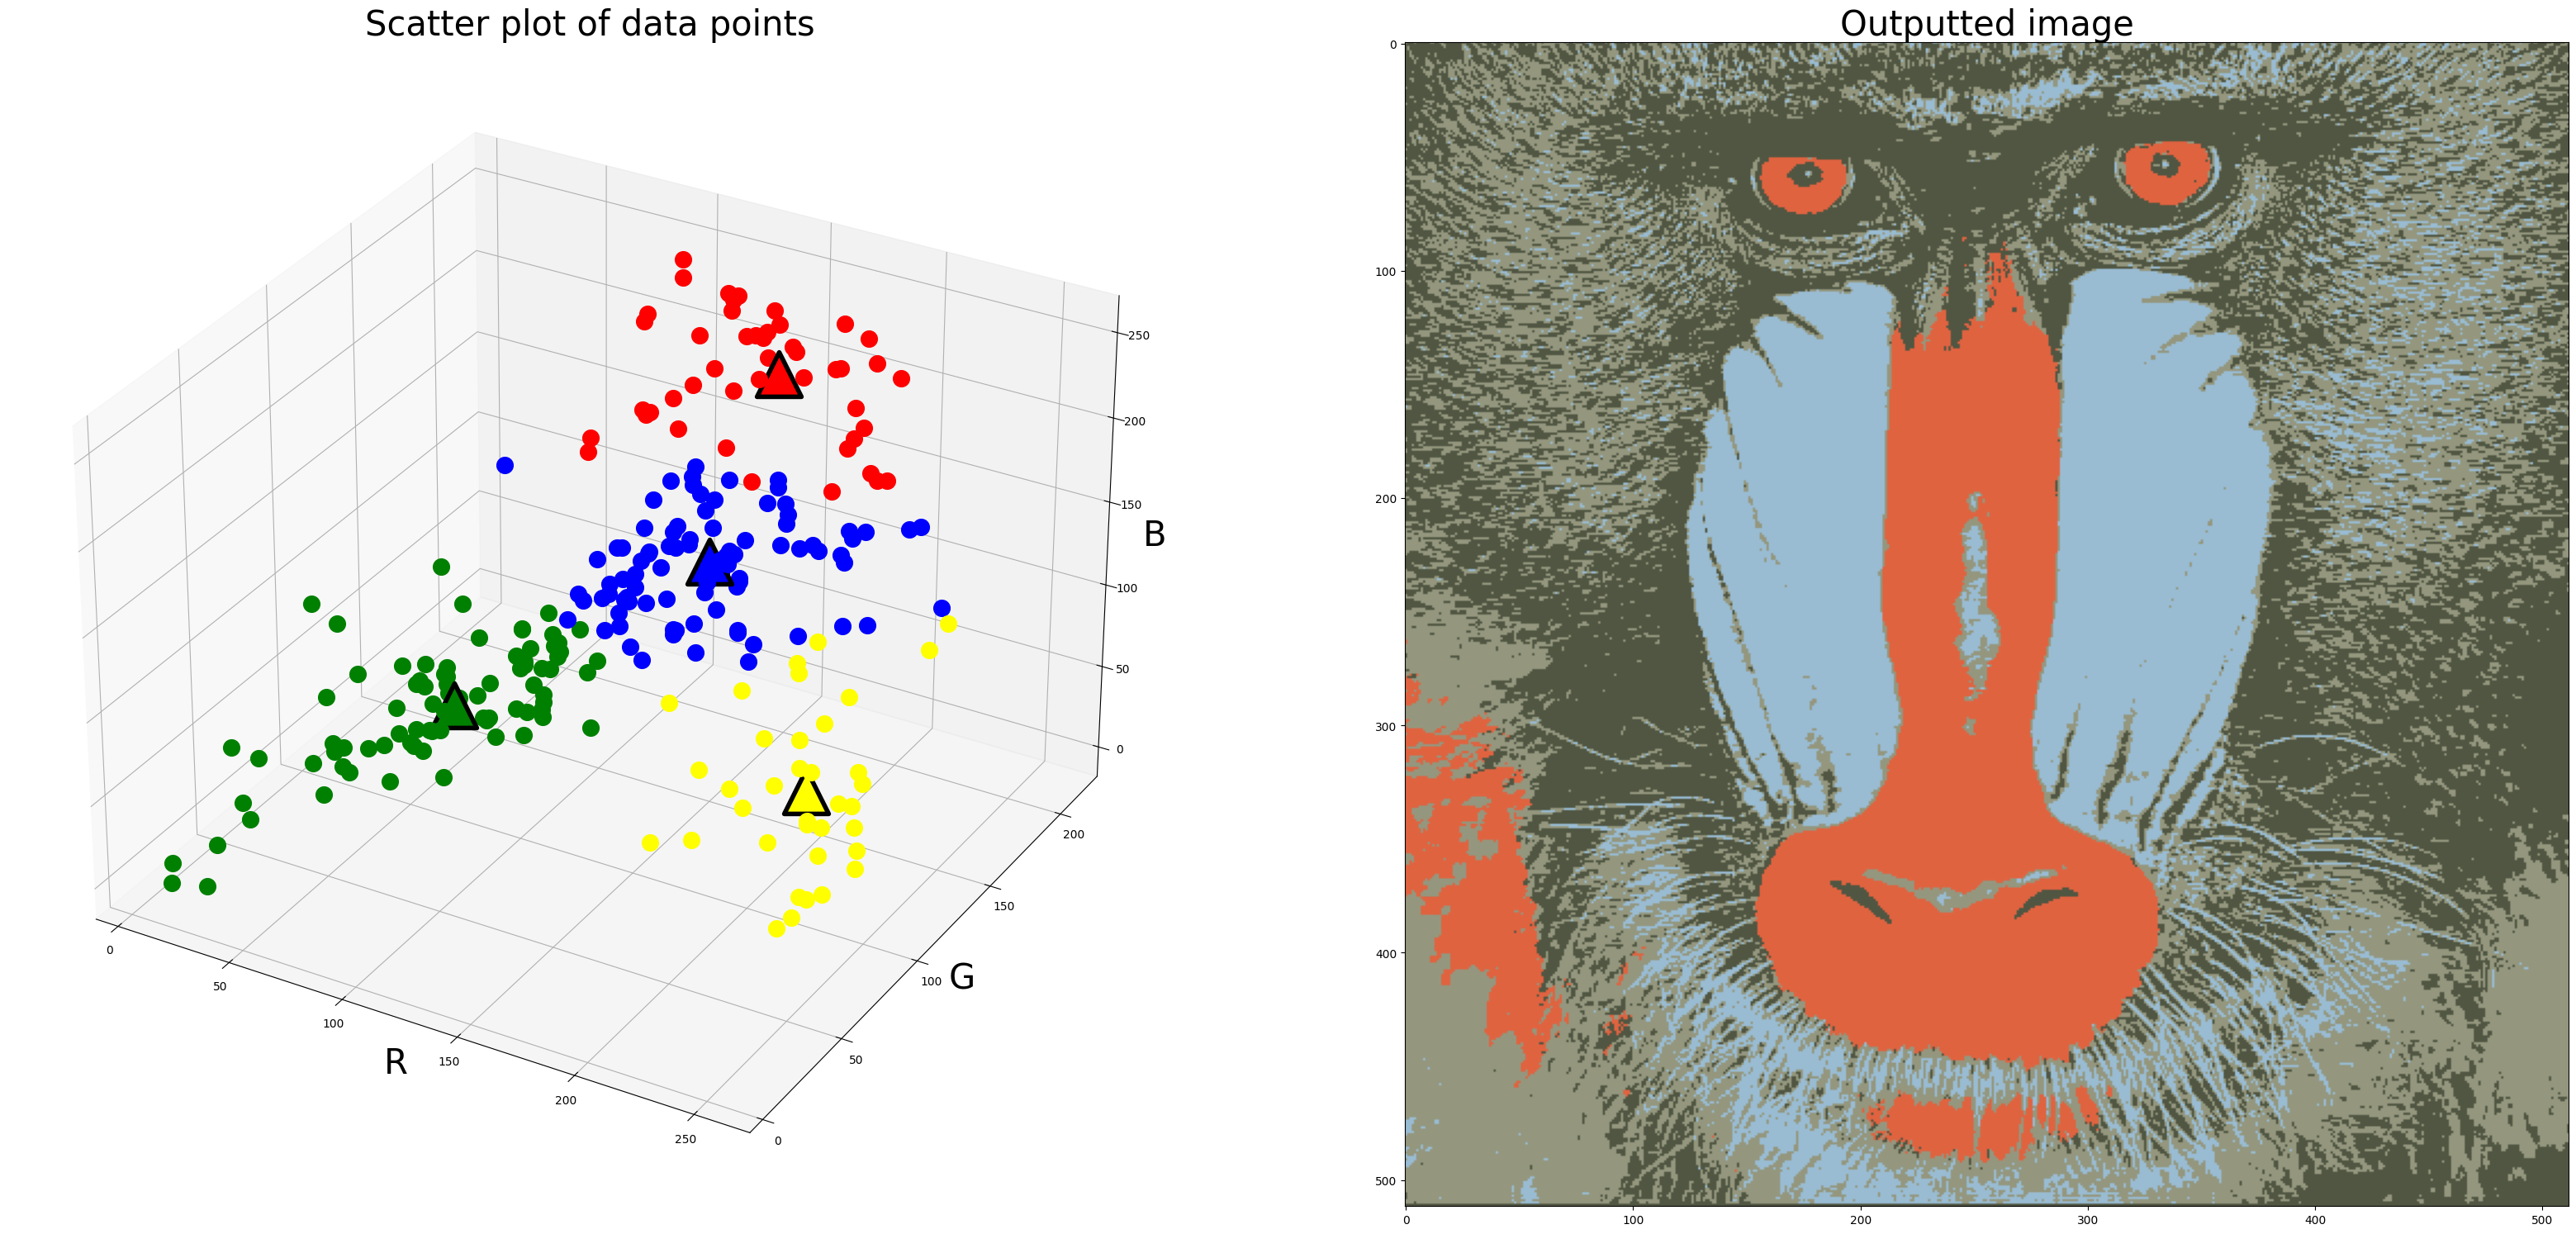

In [11]:
#Specify a random seed (will determine the random initialisation)
np.random.seed(12)
mandrill = cv.imread('mandrill.jpg',cv.IMREAD_COLOR)
mandrill = cv.cvtColor(mandrill, cv.COLOR_BGR2RGB)
plt.imshow(mandrill)
plt.show()

# Initialise your centroids and run your k-Means visualization function
data = mandrill.reshape(N,3)

k = 4
T = 8

#initialising centroids and running k-means
centroids = random_centroids(data,k)

mykMeans_visualize(data, centroids, T)

Performing K-Means ++

In [12]:
def kmeanspp_centroids(data,k):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data     : numpy array (N x d)
    #        - k        : an integer value
    # Output - centroids: numpy array (k x d)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###
    
    #initialise centroids
    centroids = np.empty((k,3))
    
    h_data, w_data = data.shape
    
    #initialise array to store the distances, probabilities
    dist_x = np.empty((h_data))
    prob = np.empty((h_data))
    
    #initalise the first centroid 
    x = random.randint(0,h_data)
    centroids[0,:] = data[x,:]
    
    
    #setting up dist_x with the distances for the first centroid 
    for j in range(h_data):
        dist_x[j] = (centroids[0,0]-data[j,0])**2 + (centroids[0,1]-data[j,1])**2 + (centroids[0,2]-data[j,2])**2
            
    #for loop to create the other centroids  
    for i in range(1,k):
        
        #probabilities 
        sumAll = np.sum(dist_x)
        for k in range(h_data):
            prob[k] = dist_x[k]/sumAll
        
        #find cumulative array
        cum_array = np.cumsum(prob)
        
        #generate random number 
        r = random.uniform(0,1)
        
        #loop to find the first number greater than r
        j = 0
        
        while cum_array[j] <= r:
            j = j + 1
        
        #set the new centroid 
        centroids[i,:] = data[j,:]
    
        #finding the new dists for next iteration
        for j in range(h_data):
            dist_x[j] = (centroids[-1,0]-data[j,0])**2 + (centroids[-1,1]-data[j,1])**2 + (centroids[-1,2]-data[j,2])**2
        
    return centroids

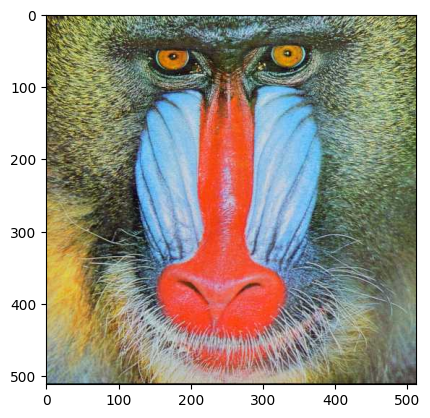

Performing k-means


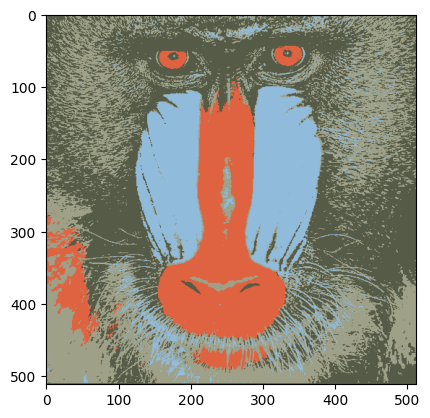

In [13]:
# We first specify our random seed here
np.random.seed(0)

### Insert your solution here ###
mandrill = cv.imread('mandrill.jpg',cv.IMREAD_COLOR)
mandrill = cv.cvtColor(mandrill, cv.COLOR_BGR2RGB)
plt.imshow(mandrill)
plt.show()

# Initialise the centroids with the kmeans++ method, and run the clustering
k = 4
T = 5

#storing the size of the image and copying it into a new image array 
h_mandrill, w_mandrill, d_mandrill = mandrill.shape
new_im = np.copy(mandrill)

N = h_mandrill*w_mandrill

#reshape data
data = new_im.reshape(N,3)

#call centroids function nd kmeans function 
centroids = kmeanspp_centroids(data,k)

cluster_idx, centroids, kMeans_loss = mykMeans(data, centroids, T)

# Display your results (image)

clust_id_re = cluster_idx.reshape(h_mandrill, w_mandrill)

for i in range(h_mandrill):
    for j in range(w_mandrill):
        new_im[i,j,:] = centroids[int(clust_id_re[i,j])]


plt.imshow(new_im)
plt.show()